# Домашнее задание 3

1) [1 балл] Реализуйте чтение изображений, лежащих в /data/imgs/arrow (как в демо с калибровкой камеры с семинара). Вся обязательная часть задания выполняется с этими изображениями

1) [2 балла] Реализуйте нахождение расстояния от камеры до листка, учитывая, что это тот же листок, что был в первом демо

2) [3 балла] Реализуйте приведение изображения листка к "виду сверху"

3) [6 баллов] Реализуйте определение направления, в котором указывает стрелка. Можно использовать скелетонизацию из первого семинара по зрению: получить маску темной области (стрелки) внутри изображения листка, применить скелетонизацию, вычислить направление. Можно поступить иначе: после нахождения маски вычислить градиенты Собеля по x и y и проанализировать их направления. P.S. Можно использовать и полностью свой метод

4) [3 балла] Примените написанный Вами код к видео https://drive.google.com/file/d/1AQhg2lL5FL4edlOcxY2SHOOZ-v9TgHBD/view?usp=sharing. Загрузите видео на свой гугл диск, а затем дополните имеющийся код монтированием диска и чтением в цикле кадров видео, приведёнными в конце семинара

5) [5 баллов] Доп. задача: определите, нормально ли видно листок в кадре. На некоторых кадрах его видно не полностью, один или больше уголков находятся за кадром. Это можно автоматически обнаруживать, к примеру используя размеры стрелки, и выводить на соответствующем кадре маркер - текст или цветную метку

In [5]:
!git clone -b main https://github.com/StarkitRobots/cvr_course 

fatal: destination path 'cvr_course' already exists and is not an empty directory.


In [23]:
ls

 ’®¬ ў гбва®©бвўҐ C ­Ґ Ё¬ҐҐв ¬ҐвЄЁ.
 ‘ҐаЁ©­л© ­®¬Ґа в®¬ : 7AAC-8D67

 ‘®¤Ґа¦Ё¬®Ґ Ї ЇЄЁ C:\Users\user\cvr_course\data\imgs\arrow

18.04.2023  15:10    <DIR>          .
18.04.2023  15:10    <DIR>          ..
18.04.2023  15:10           396я905 vlcsnap-2020-10-21-18h01m22s212.png
18.04.2023  15:10           349я708 vlcsnap-2020-10-21-18h01m27s294.png
18.04.2023  15:10           358я518 vlcsnap-2020-10-21-18h01m29s941.png
18.04.2023  15:10           336я322 vlcsnap-2020-10-21-18h01m33s362.png
18.04.2023  15:10           316я925 vlcsnap-2020-10-21-18h01m36s056.png
18.04.2023  15:10           312я812 vlcsnap-2020-10-21-18h01m41s874.png
18.04.2023  15:10           334я378 vlcsnap-2020-10-21-18h01m44s163.png
18.04.2023  15:10           314я245 vlcsnap-2020-10-21-18h01m46s644.png
18.04.2023  15:10           377я742 vlcsnap-2020-10-21-18h01m49s487.png
18.04.2023  15:10           283я849 vlcsnap-2020-10-21-18h01m51s638.png
              10 д ©«®ў      3я381я404 Ў ©в
               2 Ї Ї®Є  1я043я

In [22]:
%cd cvr_course/data/imgs/arrow

[WinError 3] Системе не удается найти указанный путь: 'cvr_course/data/imgs/arrow'
C:\Users\user\cvr_course\data\imgs\arrow


In [24]:
ls

 ’®¬ ў гбва®©бвўҐ C ­Ґ Ё¬ҐҐв ¬ҐвЄЁ.
 ‘ҐаЁ©­л© ­®¬Ґа в®¬ : 7AAC-8D67

 ‘®¤Ґа¦Ё¬®Ґ Ї ЇЄЁ C:\Users\user\cvr_course\data\imgs\arrow

18.04.2023  15:10    <DIR>          .
18.04.2023  15:10    <DIR>          ..
18.04.2023  15:10           396я905 vlcsnap-2020-10-21-18h01m22s212.png
18.04.2023  15:10           349я708 vlcsnap-2020-10-21-18h01m27s294.png
18.04.2023  15:10           358я518 vlcsnap-2020-10-21-18h01m29s941.png
18.04.2023  15:10           336я322 vlcsnap-2020-10-21-18h01m33s362.png
18.04.2023  15:10           316я925 vlcsnap-2020-10-21-18h01m36s056.png
18.04.2023  15:10           312я812 vlcsnap-2020-10-21-18h01m41s874.png
18.04.2023  15:10           334я378 vlcsnap-2020-10-21-18h01m44s163.png
18.04.2023  15:10           314я245 vlcsnap-2020-10-21-18h01m46s644.png
18.04.2023  15:10           377я742 vlcsnap-2020-10-21-18h01m49s487.png
18.04.2023  15:10           283я849 vlcsnap-2020-10-21-18h01m51s638.png
              10 д ©«®ў      3я381я404 Ў ©в
               2 Ї Ї®Є  1я043я

In [25]:
import cv2
import glob

In [26]:
arrows_pic = []
for img in glob.iglob("*png"):
    arrows_pic.append(cv2.imread(img))
    cv2.imshow("im",cv2.imread(img))
    cv2.waitKey(0)
cv2.destroyAllWindows()

In [27]:
from matplotlib import pyplot as plt

def find_contour (img, low_th, high_th):
    img_rgb = cv2.cvtColor (img, cv2.COLOR_BGR2RGB)
    
    mask = cv2.inRange(img, low_th, high_th)
    contours, hierarchy = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    max_area = -1
    for i in range(len(contours)):
        area = cv2.contourArea(contours[i])
        if area>max_area:
            cnt = contours[i]
            max_area = area
            
    
    hull = cv2.convexHull(cnt)
    
    epsilon = 0.05 * cv2.arcLength(hull, True)
    approx = cv2.approxPolyDP(hull, epsilon, True)
    
    return approx

def find_distance (img):
    low_th  = (180, 190, 170)
    high_th = (255, 255, 255)
    
    contour = find_contour(img, low_th, high_th)
    length = cv2.arcLength(contour, True)

    distance = 180.0 * 364 / length #В числителе периметр листка* расстояние от линзы до матрицы в пикселях? 
    
    return distance



In [28]:
for elem in arrows_pic:
    print(find_distance(elem))

93.28829947701294
89.53626385330922
89.64131605128499
93.87129555792578
91.78644971650084
90.65349273787176
85.9721201192204
75.0469107999023
57.758001766669665
57.54667218610544


In [29]:
import numpy as np
import math

In [30]:
def order_points(pts):
    rect = np.zeros((4, 2), dtype="float32")
    
    s = pts.sum(axis=1)
    rect[0] = pts[np.argmin(s)]
    rect[2] = pts[np.argmax(s)]
    amin = np.argmin(s)
    amax = np.argmax(s)
    if (amax >amin):
        pts = np.delete(pts, np.argmax(s),0)
        pts = np.delete(pts, np.argmin(s),0)
    else:
        pts = np.delete(pts, np.argmin(s),0)
        pts = np.delete(pts, np.argmax(s),0)       
    
    diff = np.diff(pts, axis=1)
    rect[1] = pts[np.argmin(diff)]
    rect[3] = pts[np.argmax(diff)]
    
    # return the ordered coordinates
    
    return rect

def four_point_transform(image, pts):
    # obtain a consistent order of the points and unpack them
    # individually
    rect = order_points(pts)
    (tl, tr, br, bl) = rect
    
    # compute the width of the new image, which will be the
    # maximum distance between bottom-right and bottom-left
    # x-coordiates or the top-right and top-left x-coordinates
    widthA = np.sqrt(((br[0] - bl[0]) ** 2) + ((br[1] - bl[1]) ** 2))
    widthB = np.sqrt(((tr[0] - tl[0]) ** 2) + ((tr[1] - tl[1]) ** 2))
    maxWidth = max(int(widthA), int(widthB))
    
    # compute the height of the new image, which will be the
    # maximum distance between the top-right and bottom-right
    # y-coordinates or the top-left and bottom-left y-coordinates
    heightA = np.sqrt(((tr[0] - br[0]) ** 2) + ((tr[1] - br[1]) ** 2))
    heightB = np.sqrt(((tl[0] - bl[0]) ** 2) + ((tl[1] - bl[1]) ** 2))
    maxHeight = max(int(heightA), int(heightB))
    
    # now that we have the dimensions of the new image, construct
    # the set of destination points to obtain a "birds eye view",
    # (i.e. top-down view) of the image, again specifying points
    # in the top-left, top-right, bottom-right, and bottom-left
    # order
    dst = np.array([
        [0, 0],
        [maxWidth - 1, 0],
        [maxWidth - 1, maxHeight - 1],
        [0, maxHeight - 1]], dtype="float32")
    
    # compute the perspective transform matrix and then apply it
    M = cv2.getPerspectiveTransform(rect, dst)
    warped = cv2.warpPerspective(image, M, (maxWidth, maxHeight))
    
    # return the warped image
    return warped


top
[[158. 112.]
 [293. 222.]
 [224. 402.]
 [117. 281.]]
Угол поворота стрелки:  39.173658644921446


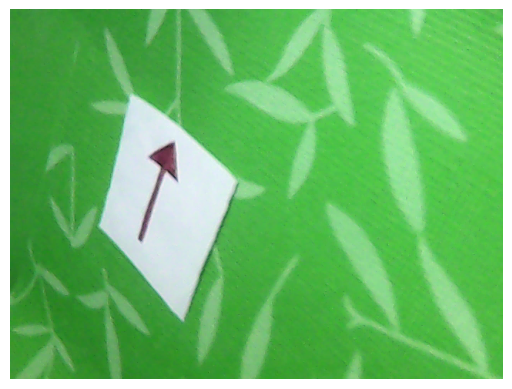

top
[[330.  98.]
 [467. 224.]
 [362. 392.]
 [256. 261.]]
Угол поворота стрелки:  42.60499541977411


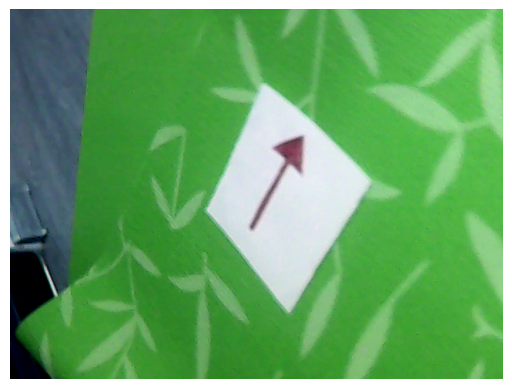

top
[[256.  72.]
 [390. 203.]
 [265. 355.]
 [161. 227.]]
Угол поворота стрелки:  44.35139624337092


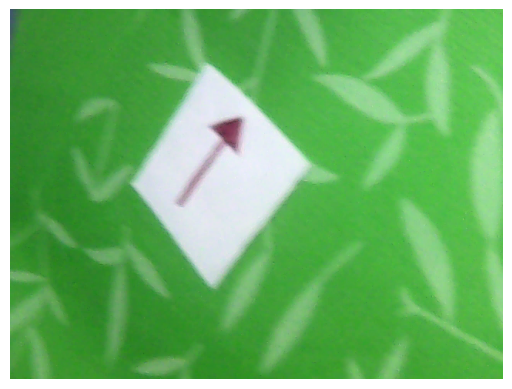

top
[[178. 246.]
 [347. 232.]
 [376. 422.]
 [216. 418.]]
Угол поворота стрелки:  -4.735582741207757


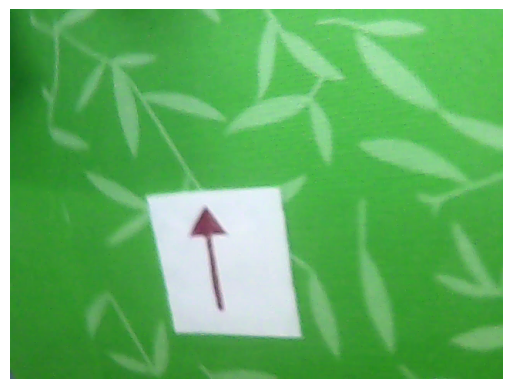

top
[[144.  52.]
 [313. 125.]
 [228. 297.]
 [ 86. 217.]]
Угол поворота стрелки:  23.36205758428707


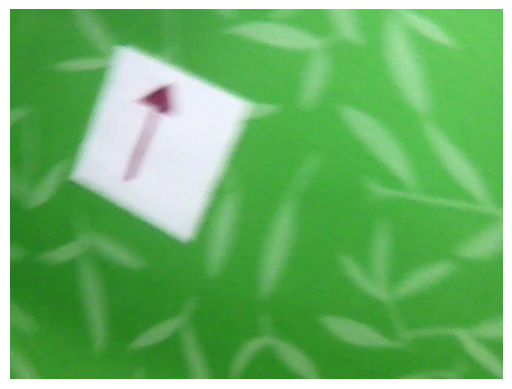

right
[[212.  28.]
 [397.   0.]
 [429. 163.]
 [234. 198.]]
Угол поворота стрелки:  81.39352707499799


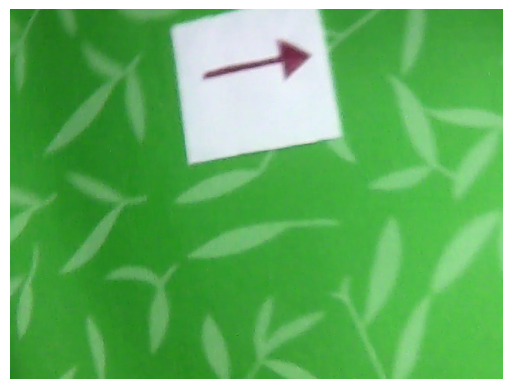

right
[[128.  92.]
 [316.  98.]
 [305. 289.]
 [107. 275.]]
Угол поворота стрелки:  91.82796822332557


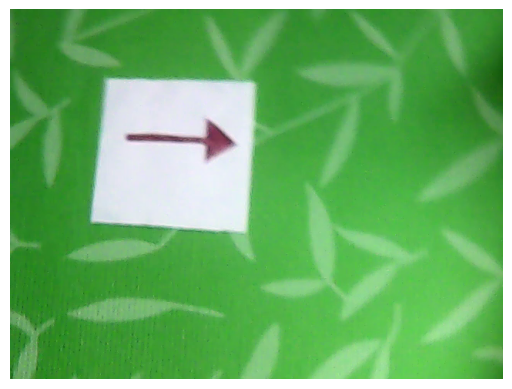

right
[[ 60.  10.]
 [261. 102.]
 [179. 314.]
 [  0. 228.]]
Угол поворота стрелки:  114.59411101243606


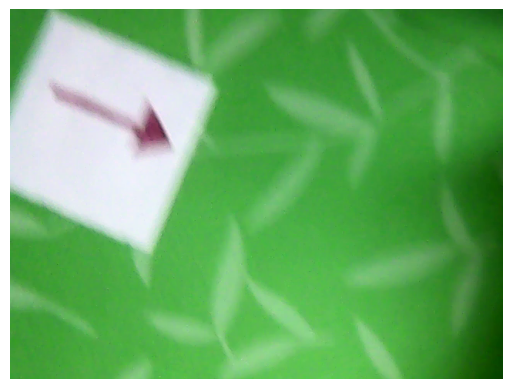

right
[[303.  41.]
 [549. 194.]
 [395. 431.]
 [156. 276.]]
Угол поворота стрелки:  121.87959717742729


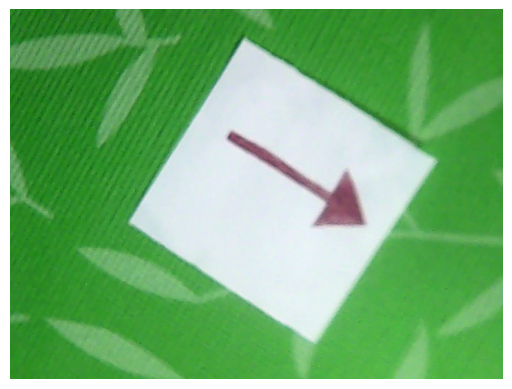

right
[[105.  77.]
 [360. 236.]
 [235. 479.]
 [  0. 359.]]
Угол поворота стрелки:  121.94475376701462


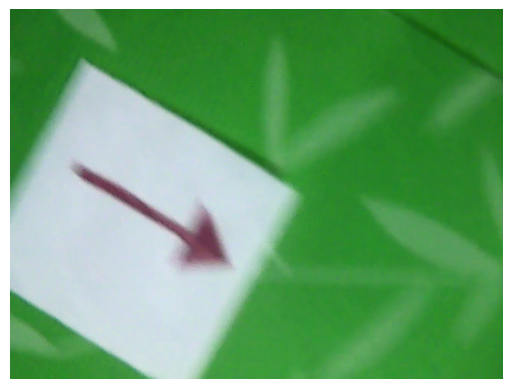

In [31]:
low_th  = (180, 190, 170)
high_th = (255, 255, 255)
for img in arrows_pic:
    plt.imshow (img)
    
    cntr = find_contour(img,low_th,high_th)

    warped = four_point_transform (img, np.asarray(cntr) [:, 0, :])
    gray = cv2.cvtColor(warped, cv2.COLOR_BGR2GRAY)
    resized = cv2.resize(gray, (3,3),interpolation = cv2.INTER_AREA)

    main_direct = min((resized[0][1], "top"), (resized[1][2], "right"),(resized[2][1], "bot"),(resized[1][0], "left"),key = lambda x: x[0])
    print(main_direct[1])
    o_cnts = order_points(np.asarray(cntr)[:, 0, :])
    print(o_cnts)
    if o_cnts[0][1] > o_cnts[1][1]:
        direct = "neg"
    else:
        direct = "pos"
        
    tg_alpha = abs(o_cnts[0][1] - o_cnts[1][1]) / abs(o_cnts[0][0] - o_cnts[1][0])
    small_angle = np.arctan(tg_alpha) * 180 / np.pi

    pinus = { "top":0, "right":90, "bot":180, "left" : 270}
    
    if direct == "pos":
        final_angle = small_angle + pinus[main_direct[1]]
    else:
        final_angle = pinus[main_direct[1]] -small_angle
    
    print("Угол поворота стрелки: ",final_angle)
    
    plt.imshow(warped)
    
    plt.axis ('off')
    plt.show 
    plt.imshow (img)
    plt.axis ('off')
    plt.show ()
    cv2.waitKey(0)

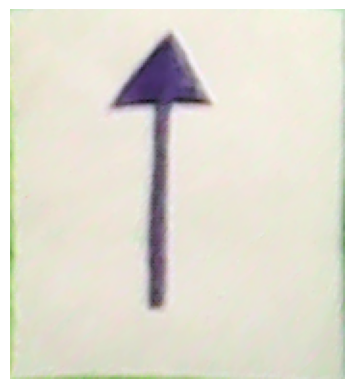

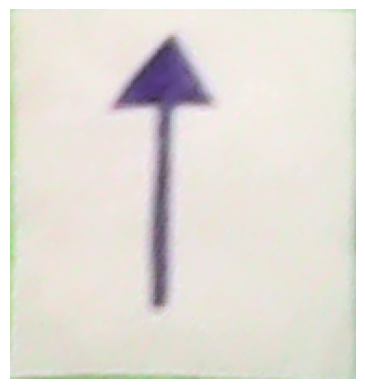

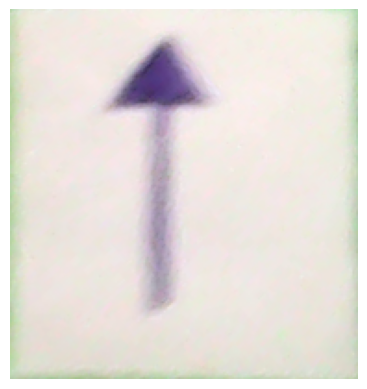

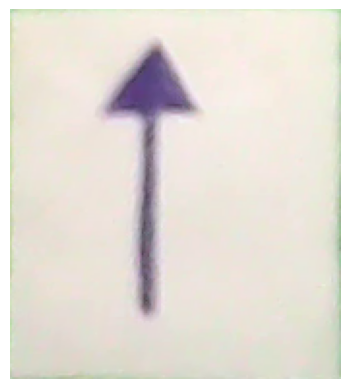

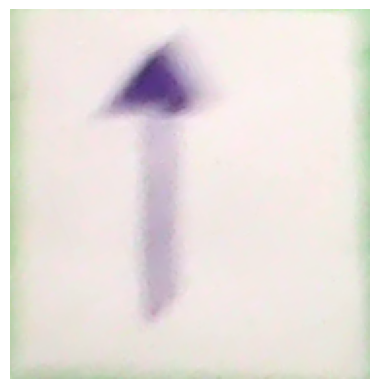

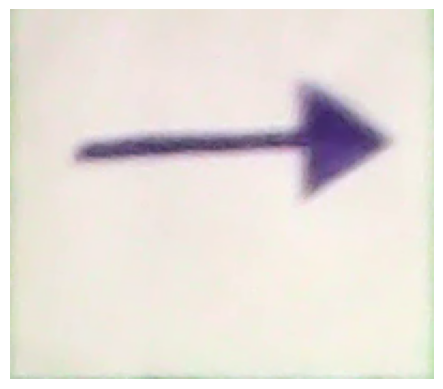

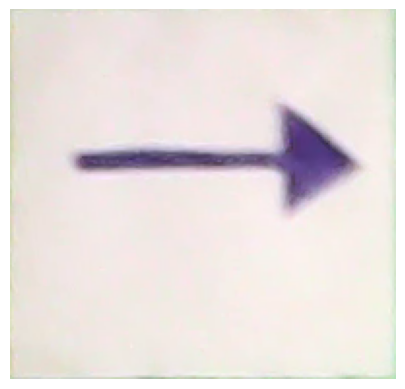

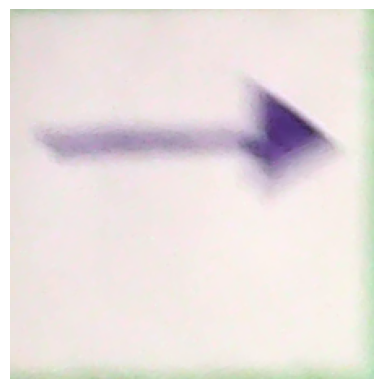

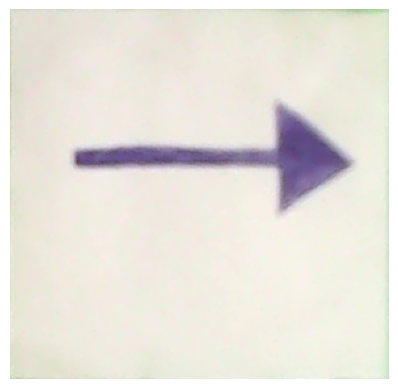

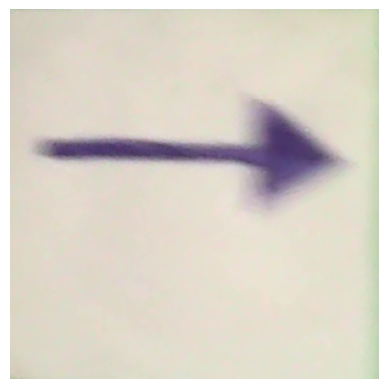

In [32]:
low_th  = (180, 190, 170)
high_th = (255, 255, 255)
for img in arrows_pic:
#     img = cv2.imread(file)
    img_rgb = cv2.cvtColor (img, cv2.COLOR_BGR2RGB)
    warped = four_point_transform (img_rgb, np.asarray (find_contour (img_rgb, low_th, high_th)) [:, 0, :])

    plt.imshow (warped)
    plt.axis ('off')
    plt.show ()